# Aim
The aim is to test pytesseract on all image formats

Original, Binary, Gray


In [1]:
import cv2
import pytesseract
import numpy
import matplotlib.pyplot as plt
import glob

import math
from termcolor import colored

tess_config = "-c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZ0123456789 --psm 6"


In [2]:
def get_image_formats(img):

    # Scales, calculates absolute values, and converts the result to 8-bit.
    plate_image = cv2.convertScaleAbs(img, alpha=(255.0))

    # convert to grayscale and blur the image
    gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray,(7,7),0)

    # Applied inversed thresh_binary 
    binary = cv2.threshold(blur, 180, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]

    kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
    dilate = cv2.morphologyEx(binary, cv2.MORPH_DILATE, kernel3)
    
    return plate_image, gray, blur, binary, dilate

In [3]:
def image_OCR(img, image_format = 'binary'):
    plate_image, gray, blur, binary, dilate = get_image_formats(img)
    #plt.imshow(binary, cmap = "gray")
    if image_format == 'original':
        inimg = plate_image
    elif image_format=='binary':
        inimg = binary
    elif image_format =='gray':
        inimg = gray
        
    final_string = resized_image_string = pytesseract.image_to_string(inimg, config=tess_config, lang="eng")
    return final_string, inimg
        

In [4]:
def get_allsize_strings(test_image, image_format = 'binary'):
    maxw = 10
    maxh = 5

    sc = 64

    str_list = []

    #plt.figure(figsize = (30,30))
    imcnt = 1
    for resh in range(0,maxh):
        for resw in range(resh+1,maxw):

            #print(imcnt)
            ww = sc + (resw*sc)
            hh = sc + (resh*sc)
            resized_test_image = cv2.resize(test_image, (ww,hh),interpolation = cv2.INTER_AREA)
            resized_image_string, inimg= image_OCR(resized_test_image.astype(numpy.uint8)/255, image_format)
            titlestr = str(f'{ww}x{hh} : {resized_image_string}')
            str_list.append(resized_image_string)

            #print(f'Detected strings : {titlestr}')


            imcnt = imcnt + 1
            
    return str_list

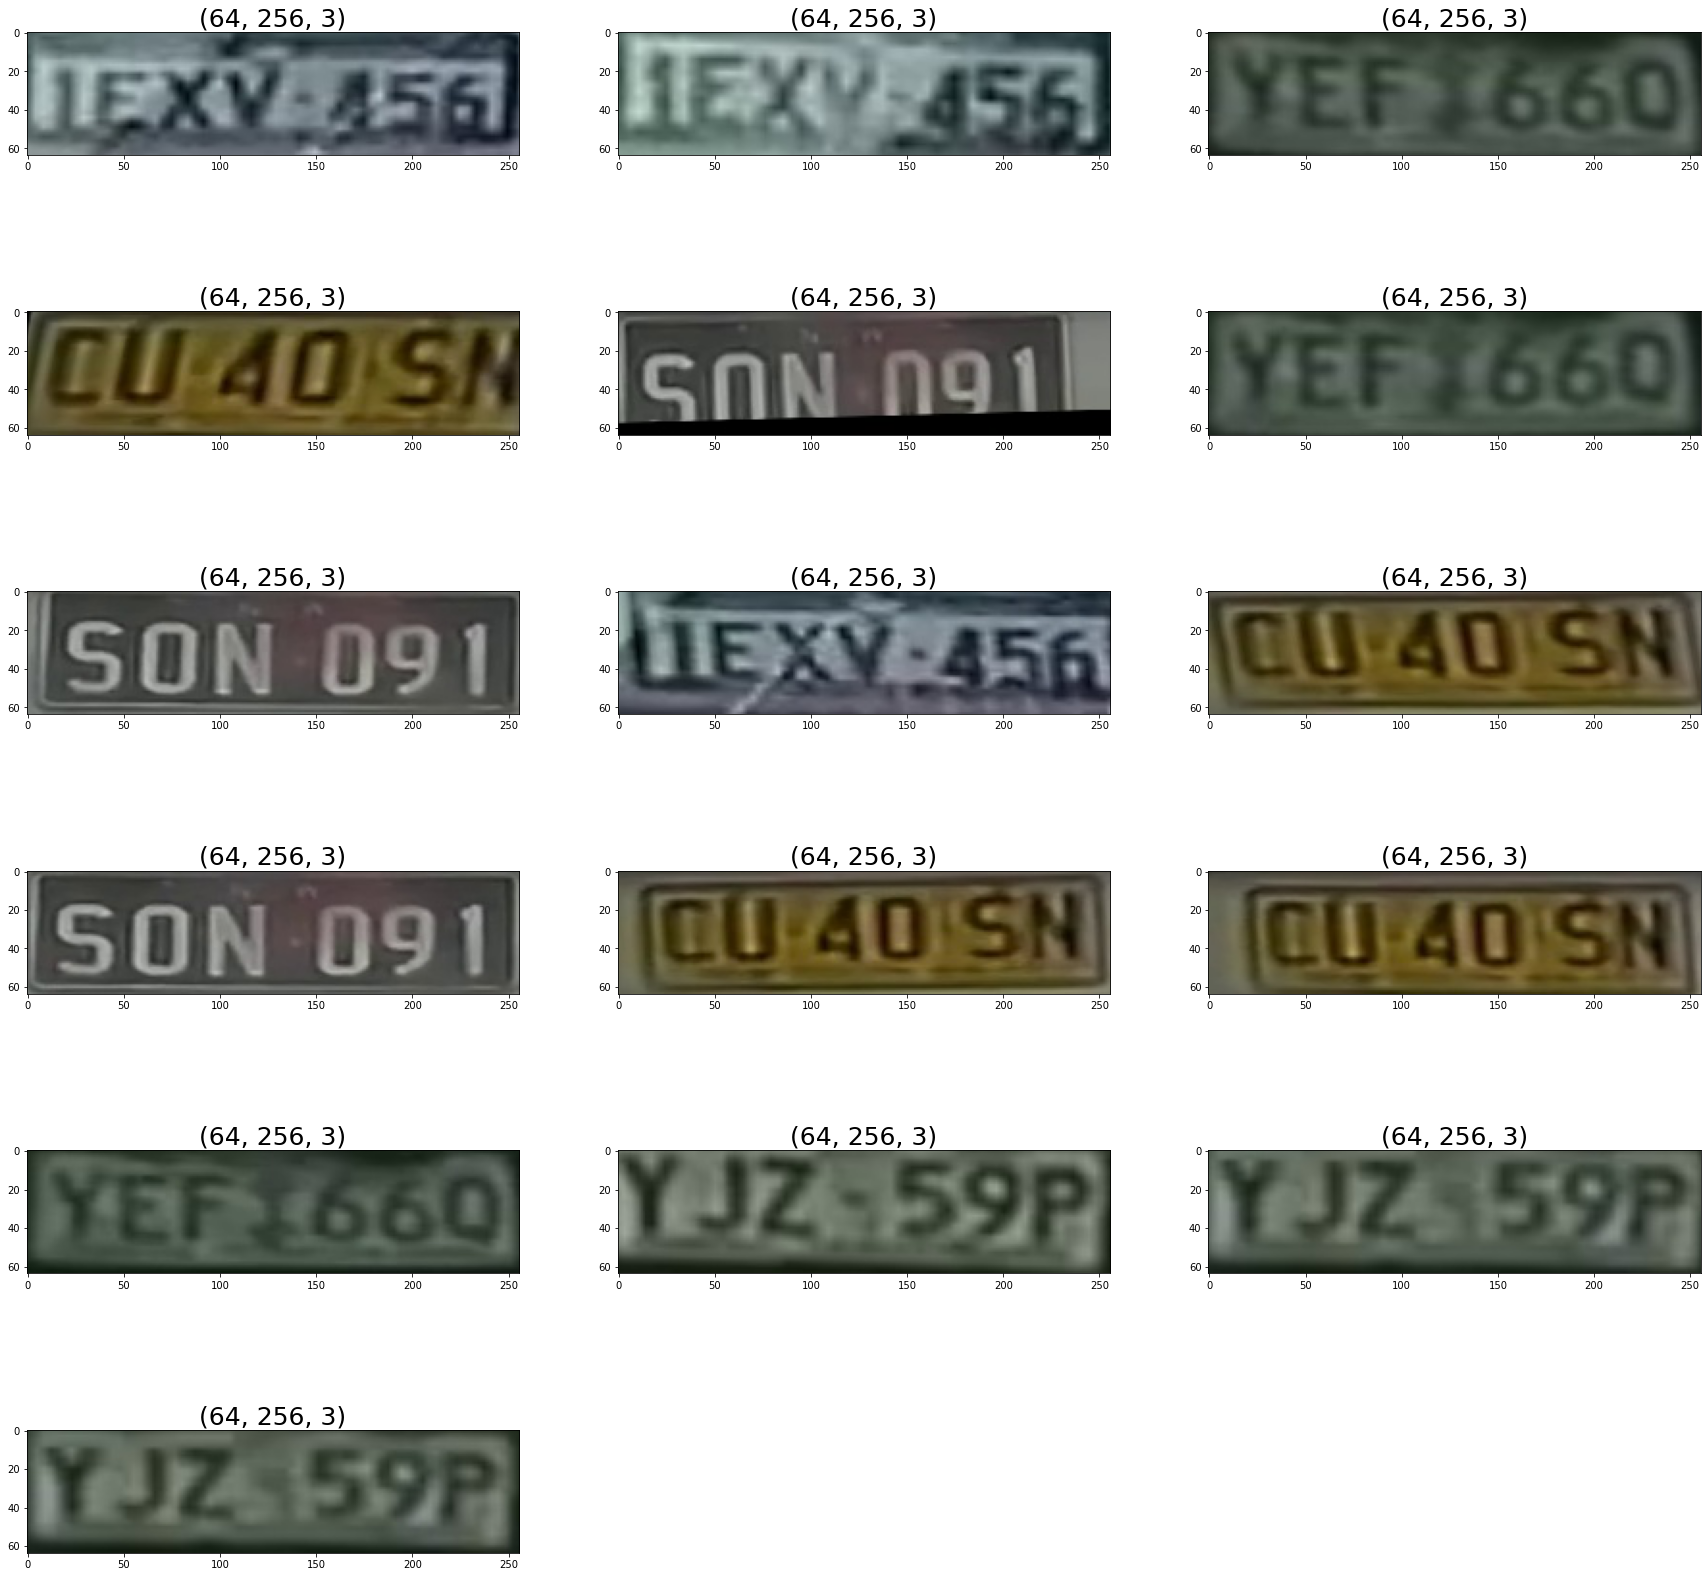

In [5]:
img_folder_path = ('../plate_samples_256_64/*.jpg')
#img_folder_path = ('../../TSK_00_MSC/wt2-body-tracker/output/Dash_cam_4/det_LpImg_crops/*.jpg')

fnames = glob.glob(img_folder_path)
fnames.sort()
#print(fnames)

cols = 3
rows = math.ceil(len(fnames)/cols)

plt.figure(figsize=(30,rows*5))
for fcnt, f in enumerate(fnames):
    img = plt.imread(f)
    plt.subplot(rows,cols,fcnt+1)    
    plt.imshow(img)
    title = str(img.shape)
    plt.title(title, fontsize=25 )

In [6]:
def test_all_formats(test_image):

    test_image_string, inimg = image_OCR(test_image.astype(numpy.uint8)/255, 'original')    
    print(colored(f'Original img pred string : {test_image_string}','red'))
    plt.imshow(inimg, cmap = "gray")
    plt.show()

    str_list = get_allsize_strings(test_image, image_format = 'original')
    print('Binary string list of various resizes')
    print(str_list)
    print('**************************************')
    test_image_string, inimg = image_OCR(test_image.astype(numpy.uint8)/255, 'binary')
    print(colored(f'Binary img pred string : {test_image_string}','red'))
    plt.imshow(inimg, cmap = "gray")
    plt.show()

    str_list = get_allsize_strings(test_image, image_format = 'binary')
    print('Binary string list of various resizes')
    print(str_list)

    print('**************************************')
    test_image_string, inimg = image_OCR(test_image.astype(numpy.uint8)/255, 'gray')
    print(colored(f'Gray img pred string : {test_image_string}','red'))  
    plt.imshow(inimg, cmap = "gray")
    plt.show()

    str_list = get_allsize_strings(test_image, image_format = 'gray')
    print('Gray string list of various resizes')
    print(str_list)

Original img pred string : 


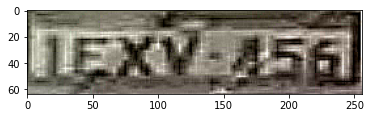

Binary string list of various resizes
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'Lex\n1b een i', "BR ARaee |'e", 'LEXV-A56]', '', 'LEXV=456]\n= i a a re Et PE a', 'EXV- 256\n= 2 eS', '= Fi eS', 'ee reo', 'LEV 5g\n<r ee', 'IXY 5g', 'LEXV-A56]', 'IEXV-A5¢]', '', 'RR\n= aA', 'IEAV sg\n<i ee a', 'INV AS\n<r e', 'LEXV #5', 'LEXV-A56]']
**************************************
Binary img pred string : fea


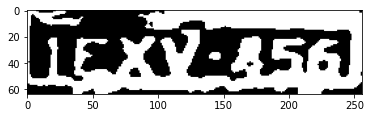

Binary string list of various resizes
['', '', 'fea', '', '', '', '', '', '', 'Ii ., ; |\n‘\nen ae ig - ed', '| ; 4 j ‘\nme ee we - ad', 'iia 7 Bn\nme ee we — il', '', '', '', '', '', '¥', '* ,\nete te amet pl', '', '', '', '', '', 'mais\nie ek ee a nd', "r '\ntee te eet — pd", 'tee ~. ae', '', 'aver\n~~ ae oe ue — sem', 'LEXV-256]\ntee 2): a ue —aem', 'ate\nmie ~ Bea ced', '', 'sade pa ~ ae', 'a ee ee oe', 'Tavera\neet ee ee we —']
**************************************
Gray img pred string : 


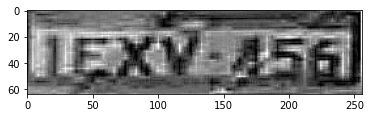

Gray string list of various resizes
['', '', '', '', '', '', '', '1.x - 255]', '', '', 'LEXV-A56]\n=F ‘eect', '', 'LEXW: 256]\n= 2 a eS', '=: me ie =', '= ee ‘ ie “ae', '= pee “Sn', 'a Sg ae ee a', 'LEAs\n1 Oe', 'Se — 3 SL\n= gree ee', 'LEXV-A56]\n=F, om oH ea =', 'ee', 'LEXV=456]\ni a. % Hi fe bi —', 'EXY:- #56\n= gS Se ae', 'ee a 3 HF fs bry ——', 'Lil 4 P= sa iid\nF, Umi id Soy =', 'lev\n=o, a oe Ps) =', 'LEXY 5a\n=e, a ii ea =', 'LEXV:A56]\n<a', 'x . } Ls\nPly Pa 3 . d y ad\n=a pt ie Py t\n\nfom LU =', 'LEXV #56]\nPo = i FF ie F ——', 'RR\n- ‘i " eT Py ea', 'enV sg\n<a eee', 'IVS\n—_ rt _ — Peo —', 'a Ls\nF ! ‘ / iE ;\nie - | Ry i\n—" iit) i', 'LEXV-A56]']
********************************************************************************************
Original img pred string : 


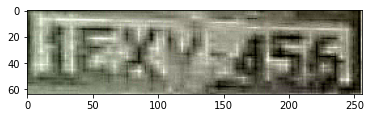

Binary string list of various resizes
['', '', '', '', '', '', '', '', '', '(Be', '', 'EXY 56!', 'HEXY-456)', 'HEXY 456)', 'HEX a5e}', 'EY -g5e]', 'Ex -aSe]', '', 'EV 58', 'LEY 456', '', 'HEXY 456)', 'HEXY-456)', 'HEX Y-s5e', 'ar?', '', '', '', '', '', 'Bh', '', 'ar', '', '']
**************************************
Binary img pred string : Her 3


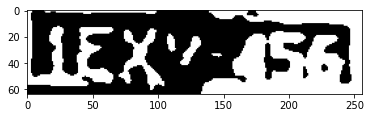

Binary string list of various resizes
['or', 'NSO', 'Her 3', '', '', 'iso SS', 'gia ee 7', 'Sf aaa 7 |', "i= = '-+-asceil", 'aor', 'aor', 'ear', 'ar', "HE X'- 456!", 'aCe 3', 'HaCr 4', 'Heer SA', 'ag', 'or', 'or', 'ara', 'ara', '', '', 'ae', 'aor', 'or', 'aor', 'ear', 'era', 'Ro', 'os', 'Ron', 'or', 'ear']
**************************************
Gray img pred string : 


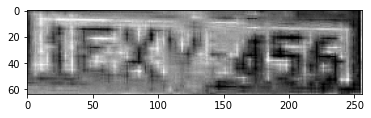

Gray string list of various resizes
['NEY 456', '', '', '', '', '', '', '', '', 'ar', '', 'EXV 56)', 'HEXY-456)', 'HEXY-a5e)', 'HEX a5e}', '', '', '(BN Be', 'EV', 'NEY 456)', '', '', 'HEXY-456)', 'HEX Y- 456)', 'IB.', '(Ee', '', '', 'HEXY-4561', 'HEXV 456)', 'aU', 'LEN', '', 'Ia', 'NEY 456']
********************************************************************************************
Original img pred string : 


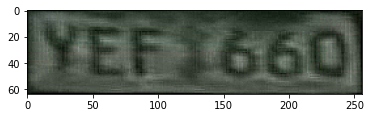

Binary string list of various resizes
['', '', '', '', '', '', 'SEE Soot)!', '', '', '', 'YEF 600', '', '', '', '', 'YEES660)', '', '', '', '', 'YEFI660)', 'YEFI660)', '', '', '', '', 'VEF SOO', 'YER Z660', 'YEFZ660', 'YEF 660)', '', '', '', 'YER A600', '']
**************************************
Binary img pred string : IYEF 3660)


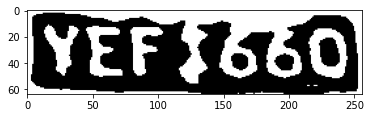

Binary string list of various resizes
['Tai)', 'TI)', 'IYEF 3660)', 'YEF J660', 'IVEF F660)', 'IVYEF 3660)', 'iIVWEF $660}', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
**************************************
Gray img pred string : 


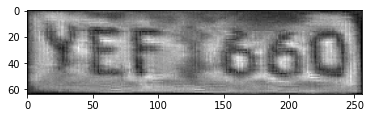

Gray string list of various resizes
['', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
********************************************************************************************
Original img pred string : IEWPADISH


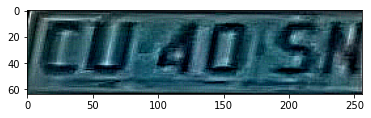

Binary string list of various resizes
['CUADISH', 'EUADISH', 'IEWPADISH', '/EWAGSH', '(EU AGISH', '(flI-A SH', '', '', '', '', 'GUADISH', 'EUADISH', 'EUADISH', 'EWADISH', 'IEWADISH', 'IELADISH', '/ELAGISH', '', '', '', '', '', 'EUADISH', 'EWADSH', '', '', '', '', '', '', '', '', '', '', '']
**************************************
Binary img pred string : ICU-A0-SN


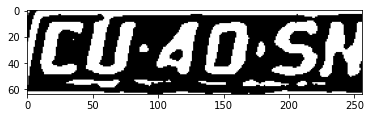

Binary string list of various resizes
['ETS', 'CU-40-SN', 'ICU-A0-SN', "ICU-40'SN", "‘CU-4AO'SN", '(oe Ie TY', '', '', '', '', 'ETS', '(aE', 'CU-40°SN', "[EU-40'SN", "[EU-40'SN", "/EU-40'SN", "/EW-40'SH", '', 'C40', 'ETB', "CU-40'SN", "EU-40'SH", "CU-40'SN", '(ES', '', '', 'aE)', 'IETS', 'IETS', "EU-40'SN", '', '', '', '', '']
**************************************
Gray img pred string : EWADISH


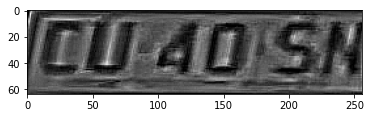

Gray string list of various resizes
['CU ADISH', "EUAD'SH", 'EWADISH', 'EW AG‘SH', '(EU AGiSH', '', '', '[ESET 9 IP SPY', '', '', 'CUADSH', '', "EUAD'SH", 'EUADISH', '/EWADISH', 'IEW ADISH', '/EWAGSH', '', 'OUA0SK', 'CU ADSH', "EUAD'SH", 'EUADISH', "EU AD'SH", "EWAO'SH", '', "iraint\nQU A0'Sh", 'OUAOS)', 'CUADSH', "CU O'Sh", 'EUADISH', 'Rit ine\nra0S|', 'Fo ree “ .\nOUA0)', '', 'CVAD)', 'CUADSH']
********************************************************************************************
Original img pred string : 


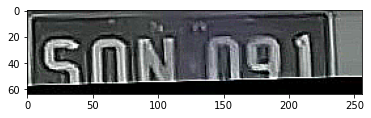

Binary string list of various resizes
['', '', '', '', 'lenn nailk', '', '', '', '', '', '', 'Veen.', '‘enn noill', 'cnn noill', 'eS ———\nsa Se A ee\nfear ih ee ie', '', '', 'me oe\na ee\nol 1 Ws', 'Ren', '', 'enn nat', 'a ——\neres A ea\nam il SS i te', '‘cnn nol', '', 'SHI', 'Rr', '', 'a cian Sa r\nBi eee ane\nos i i te', 'ein 1 tes 2', '', 'r 3 : |\nRel', 'r a | nm\nerin', 'en el\nLS ee\nt | ee | ;', 'Rin i i E', 'yy m1']
**************************************
Binary img pred string : IcAn.noil


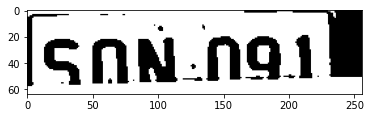

Binary string list of various resizes
['cou.nail', 'Icnn-nail', 'IcAn.noil', 'icnn-naoik', 'Icnan-naild', 'ficnAn nail', 'ficnN nail', '[—anmm- nmai1ii', 'f= mn mae! le', '', '', '', '', 'canna', '', 'ISAn nak', 'icnenaik', '', '"ON on °\n\'', '', 'cannoli', '', '', 'Icnw-noill', '', 'enw nadk', '', '', 'c aNnaik', '', '', ': Yon .\n|\ni :', '', 'nw.', 'eqw.nail']
**************************************
Gray img pred string : 


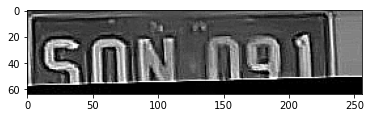

Gray string list of various resizes
['', '', '', '', 'Staten', 'fenm nail', '', '', '', 'Te\nnl ue', 'Ranvier', 'Veen.', 'EET hh real ;\niene', '', '=a bP en W = -\nf i ih ee =', '=e Bey es :\nI PAN ee\na aE ke a =', 'a cP ae a = =\nI n A ke ao # =', 'Tie\nTL Ee', '', 'Ts\niS ma EM\ni be a Hy i', 'th\ni a ¢\nSty en\n0 WRN de > Med', 'Sh ie\ni i Vn Th\nIr ee\nTe', 'y i os ¢\nrail ASS Hh te', 'i i >» <\nTnL he', 'at\nPAL AAT\nty i nye', 'mes\nel\nte', '— eo\nBi) ho ae\nY if Ws 4\ni | \\ “4 “t', 'my Toe\n1 Volt\nve ee', '— ee\n\neh) Wr Beet ae\niT my ¢\nSo', 'ih ae\ni oe ¢\nI een\na ed te ke', 'TNs\nVe', "= aa\nmh ta\nr. i | ¥; i!\ni ' | \\ Ay “i", 'Tit\n| Yall\nWHA ee ie', 'a —_\nBi ye oo ae\n} | av 4\nh I \\ | 1 i>', 'aT\n1 Yalt:\nye ek cee']
********************************************************************************************
Original img pred string : YEFI660


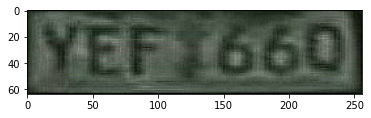

Binary string list of various resizes
['', '', 'YEFI660', 'YEFZ660', 'YEFZ660', 'YEFZ6GEO', 'Er 2 SG: =<)', '', '', '', '', '', '', '', 'YEFZ660', '', 'YEFZ660', '', 'VEF {bb', 'YEF {660', 'YEF {600', 'YEF 660', 'YEF 660', 'YEFZ660', '', 'Abe L aa ati si .', 'UP LOOW\nyen rte i.', 'it ge = 2 a a', 'YEF {600', 'a | F ’ i Ld el\na = 2 i a sais mpl i', 'feiss <7 ——', 'fal oes = ae —— ;', 'tT ADDY\nihe as 7 Be ie — an', 'YEFIO0U', 'iS bie = = ae ,']
**************************************
Binary img pred string : YEF 660}


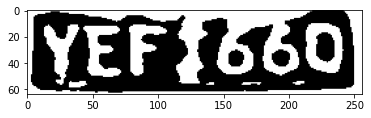

Binary string list of various resizes
['agit)', 'aig (155)', 'YEF 660}', "'YEFJ66O}", 'IYEFIJ660}', 'IYEFJ6é60}]', '', '', '', '', '', '', '', '', '', '', '', '', '', 'arf!', 'adi sae', '', '', 'sao TTA0', '', '', 'apie', 'aa!', 'faa {Tat', 'fae {ttt', '', '', 'fat', 'aie', 'apts']
**************************************
Gray img pred string : YEF 660


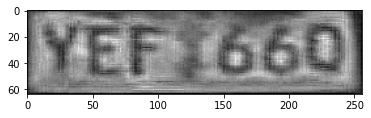

Gray string list of various resizes
['', '', 'YEF 660', 'YEFZ660', '', '', 'YEFZEoOSO', '', '', '', 'YEF {660', '', '', '', '', "'YEFZ660", '', '', 'VEF {000', 'NEF {600', 'YEF {660', 'WEF I660', 'YEF {660', 'YEF 660', '', 'NEF BGO', '4 F he 7 F .\nit de: x 7a Pye AR sa i ’', 'YEF {600', 'YEF {660', 'VEF {660', '', 'a % a .\nvl dye Le 7 Ba site ;', 'MEF IG', 'VEFTO00', 'YEF {600']
********************************************************************************************
Original img pred string : Gon en


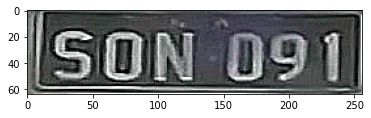

Binary string list of various resizes
['', 'Gaer', 'Gon en', 'mien', '[ISON O91)', '(Ete arent', '(K=falS(yotea', '', '', '', '', '', '', 'oer', '', 'Eoen', 'Emin', '', 'Sn', '', 'Guy)', '', '', 'oer', 'RT', '', '', 'Een]', '', 'Gonien', '', '', '', 'EET', '']
**************************************
Binary img pred string : ISON O91)


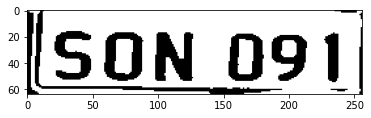

Binary string list of various resizes
['SON 091', 'ISON O91', 'ISON O91)', 'ISON O91', '[SON O91!', 'ISON OO1)', 'ISON OO1!', 'ISON OO!', 'ISON OO!', 'SON 09!', 'SON 091', 'ISON 091', 'ISON 091', 'ISON 091,', 'ISON O91,', 'ISON O91)', '[ISON O91]', 'Sov 091', 'SON 091', 'SON 091', '', 'ISON 091', 'ISON 091', '', 'Sa 091', 'SN 091', '', '', 'SON 091', '', 'Sou |', 'SON 091', '', '', '']
**************************************
Gray img pred string : | SON 091


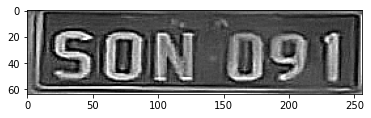

Gray string list of various resizes
['', 'Gaen', '| SON 091', 'Eien', '(Ete one', '(Ete ate nt', '(Etats (yore i', 'iK=Sfail iene', '', '', '', '', '', '', 'GoNen', '', '', '', '', 'ET]', '', 'ISON 091)', '', '', '', '', '', 'Een]', '', '', '', '', '', '', 'Een']
********************************************************************************************
Original img pred string : HEXV-456


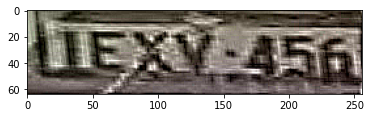

Binary string list of various resizes
['ed ar re', '', 'HEXV-456', '', '', '', '', '', '', '', '| Le ih', '', '', 'a Se', '’ Tha Pe % 1: 1 *\niin = fea 456', '- a ed = = ae', '- i = oe 456', 'Mah Soiree', '', '', 'HEX) jae', 'Me oe ee ee', 'ie —— a er a ee', '', 'bewlaihis th,', '', '', 'Ader Ch tall', 'HEXY-456\ni a a oa', 'HEX\\ | hi ne', 'im i\nheaetf sdihas ch,', '', '', '', 'LEX! p-aRG']
**************************************
Binary img pred string : ‘meme te tp ee bh ee


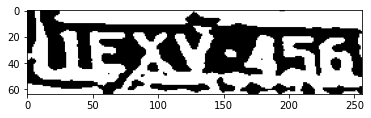

Binary string list of various resizes
['', 'Water\n> mae he te ten eo', '‘meme te tp ee bh ee', 'fee, ee eee', 'XY - 456)', 'Pa', '(urs rae ea\neee _ fie -a_- in =<!', 'p48 aT', '(ait -> ae aera\nae _ ie -a_- i. <=?', 'fat eyewe', '', 'A 7 et', 'Wi | rein, be Beeb eden', '', 'AT F weenie, Verte hy waded', 'iT ioe, eee eee', 'LE x ea\nAT Fo waceeenien Sar ie-tee By wade', 'i Ait', 'Danes. J > sertin be bu4:4 sae', 'Tater\nM | -teertin bed 04 aoe', 'Nata\nMT | esertin be th wae', 'Tae yy\niT scorn be B42.b ade', '1TaX om', '1 EX a i: ¢', 'is "aait', 'ater', 'Star', '', '- aN ; . ¢', '', 'IEW', '', '', '', '']
**************************************
Gray img pred string : oe + aE opengl Hl


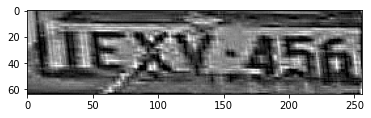

Gray string list of various resizes
['', 'LEXY 456', 'oe + aE opengl Hl', '= >. | eS ee', 'Py 2 ee eee', '', 'os ee ee ee ee eee', 'os = eS EES eee', '', '', '', '', '', 'a A i 7', '< i Sa', '= 3 a', 'ae =f ee a =', "' A anh\nLE of ed ie ch", 'LILA Ap\nLEXY 56 ee', '4 A 7 ri', 'é A, ar\nil : i i: i : |', 'a a - Fi', 'a r ‘4 ; +', '“7 rh - 7 Fi', 'LAY ar\nIEA rN', '] A L lt', '; A “ ‘f\nLE 7 {eT eae', 'a A . : : fi', 'a FA, iL : ‘', '7] A - : ri', ': A | i\nE i 4', '/ \\ f\nLE tine Ther ee', '5 A . : , ‘', '4 A, L : . ,\nLE > tah Va f', '4 A L t A']
********************************************************************************************
Original img pred string : \CWADISN


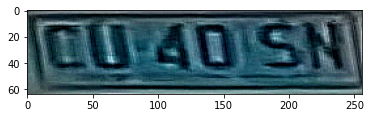

Binary string list of various resizes
['', '[>', '\\CWADISN', '(G4 0ISN', '(Gra 0ISN', '(a4 0tSN', '(baa OS', '(\\(SearnaoisSspNr', '(been OS re \\', 'QUO', 'RUAOISH', '(EUIATISN|', '(EQA0ISN)', '(EU 0iSh|', '\\EWADISN|', '\\eU40ISN)', 'G4 07SN)', '', 'ES', 'RUATSH', 'EUADISH|', '(RUOISN|', '(EUMA0ISN|', '(cUA0ISN|', '', 'quo\nQues', 'ATS', 'RUTH', 'UATISH!', '(GUADISH', 'ing', 'qUa0Sy', 'QUO', 'qUA0SN', 'RUTH']
**************************************
Binary img pred string : (ud COTS)


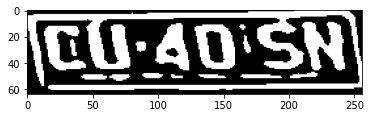

Binary string list of various resizes
['AED', 'OED)', '(ud COTS)', "\\cG-40'SN|", "{cG-40'SH\\", "{cU-40'SN\\", "\\Gas-40'SN\\", '‘Va 6 Er hu hh 4 5', '1 ea © Er hu hE S55 il', 'ae', 'TOE', 'OTSA)', '(Te eAT)', '(HAC Tapa}', "(cG-40'Sh|", 'Ted Er Lees y}', "\\GG-40'SN|", '', 'ES', 'TOES', 'RETEST)', 'TST)', 'OTE)', '(A CANT)', '', '', 'TS', 'PUES', 'TEST)', 'ACTS)', '', '', 'Or', 'fu', 'ET']
**************************************
Gray img pred string : \COAUISNH)


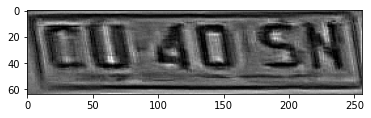

Gray string list of various resizes
['RUAUISH', '(EU 0ISh)', '\\COAUISNH)', 'GUA 0iSN|\\', '(GA 0TSN|', '(a4 0TsnNn|\\', '(aaa. 0TSN\\', '(Stara OS |\\', '(tant Sr \\', '', 'US', 'EUAN!', '(EU 0iSN)', 'eA 0iSNh)', '\\eWA0ISN|', 'jelWA0ISN|', 'eA 0ISH|', '', 'ES', '', '', '(QUA0ISN)', '(EU40ISN)', '|W 0ISN}', '', '', 'quar', '', '', '', '', 'cans', 'QUAnsN', '', '']
********************************************************************************************
Original img pred string : ISON-091)


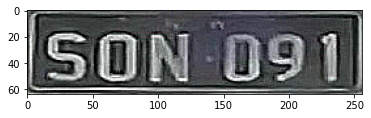

Binary string list of various resizes
['', 'in nien)', 'ISON-091)', '[SON O91)', 'fol sien', 'tol Sate', 'K=Tol siete', 'Tal siete', '', '', 'Ge)', 'Sinien', 'ISON-091)', 'aie', 'ISON-091)', '[SON-091)', '[SON O91)', '', '', 'Gin)', 'Gini', 'Gali)', 'Canned)', 'Gaien', '', '', '', 'Gi)', 'Gen', 'Sien)', '', '', '', '', '']
**************************************
Binary img pred string : ISON 091]


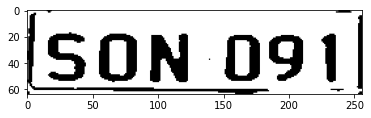

Binary string list of various resizes
['SON 091', 'ISON 091', 'ISON 091]', '[ISON O91', '[ISON O91]', '[ISON OO', '[son OO 1]', '[son OO 1]', '[som oo1]', '', 'SON-091', 'SON-091:', '', 'ISON-091|', 'ISON 091)', 'ISON 091', '[SON O91]', '', 'SON-091', 'SON-091', '', '', '', 'ISON-091|', '', '', '', '', '', '', '', '', '', '', '']
**************************************
Gray img pred string : ISON -091)


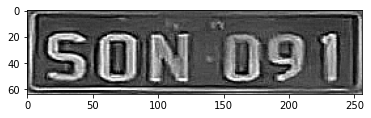

Gray string list of various resizes
['', 'Gian nien)', 'ISON -091)', '[SON 091)', 'folie', 'tol Staten', 'K=Tol siete', '(Smm -o9 1)', '‘SsSwmm os 1)', '', 'Ge)', 'Snien', 'ISON-091)', 'aie', 'ISON 091)', '[SON -091)', '[SON O91)', '', '', 'Gi)', 'Ginuien', 'Caley)', 'Can nien)', 'Gain', '', '', 'An)', 'Gin)', 'Gen', 'Cen)', '', '', '', '', 'SON 091']
********************************************************************************************
Original img pred string : (EWA0ISN


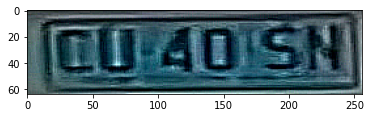

Binary string list of various resizes
['', '(QW40ish)', '(EWA0ISN', '[GWA0tsn)', '{GGFA0TsN)', '', '', '{(etrraA Ost', '(Visa DSF', 'aos', '(CUA0SN', '', '', '(ea0isn|', '(EWA0ISN)', '{eGt40tsn)', '{GQla40tsn)', '', '', '(UA0SK', '(U/40iSH|', '(GU40ISN', '', '', 'cana', '(aot', 'ES]', '(GUA0SH|', '', '', '(ast', '(aos', 'qUA0SN', '', '']
**************************************
Binary img pred string : (cU-40'SN}


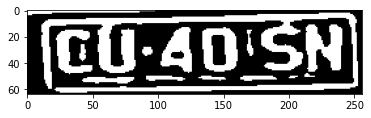

Binary string list of various resizes
['(U-40.5N', '[OS', "(cU-40'SN}", "(GG-40'SN)", "(GOU-40'SN]", "(cG-40'SN|", "(Gau-40'SN)", '{ca -42D0 SN)', "{ats -a4ao'snh)", '', 'ETS', '(ZS)', '(ET)', '(oT)', "(CU-40'SN]", '(Ce RTS)', '(ea pr HS)', '', '', '', '(OS)', '(URIS)', '(SS)', "(GU-40'SN", '', '', 'eS', 'ETS]', 'OST)', 'LTS)', '', '', '(we', 'ETS', 'OST)']
**************************************
Gray img pred string : (eia0ish|


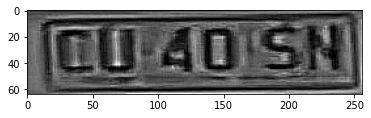

Gray string list of various resizes
['', '(CWA0ish)', '(eia0ish|', '', '{eOrAgisn)', 'jeuranTsn)', 'jena 0otsN)', '', '', '', '', '', '(CUA0ISN]', '(GUA 0iSH]', '(CWA0ISN)', '(EWA0TSH|', '', '', '', '', '(UZA0ISH|', '(GUi40ISH|', '', '{qQfa0ish)', 'aan', '', 'qUA0SN', '', '', '', '', 'cash', '', '(eQ40Sh', '']
********************************************************************************************
Original img pred string : ‘(COf0ISN|


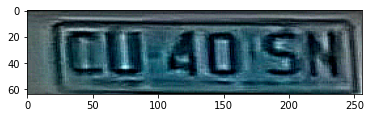

Binary string list of various resizes
['(ans', 'GUADISN', '‘(COf0ISN|', '{G05 0ISN', '‘{GOs40iSN)', '{feurTa0isn)|', 'jfeuan0rsn|', 'jfeusan0TsNy)\\|', '', '(aos', '', '(QUADISN', '', '', '', '', '‘{GOFA0iISN)', '', '', '', '(WansN', '', '', '', '', '', '(ans', '', '', '', '', '', '', '(Wa0sy', '(UansN']
**************************************
Binary img pred string : Pr LST)


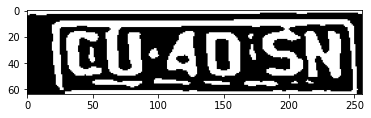

Binary string list of various resizes
['aS', 'EY', 'Pr LST)', "(GU-40'SN)", "(GG-40'SN)", "(GG-40'SN)", '', '', '{(Gats-asa0 TSN)', '', 'OTS)', 'TES]', 'ES)', 'RE)', 'HOPS)', 'co Say', "{G0 40'SN|", '', '(40s', 'aS)', 'ITS', 'TES', 'TEST', 'HOPS)', '', '', 'aE', '(aos', 'Ors)', 'OTS', '', '', '', '(40H', 'EIS']
**************************************
Gray img pred string : {COl40iSN


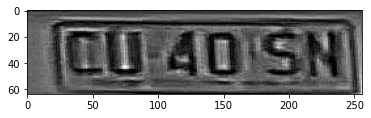

Gray string list of various resizes
['(WON', '(QUA0ISN', '{COl40iSN', '(@O40ISN', "{G@O40'SN", '{feo 40isn', '{fen 4a0isyN', '', '', '(ues)', '(aosN', '(QUA0ISN', '(QU40ISN', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '']
********************************************************************************************
Original img pred string : YEF 2660


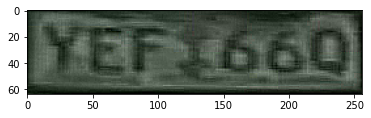

Binary string list of various resizes
['', '', 'YEF 2660', 'YEF 2560', 'VEF2560', 'VEFrFsooo', 'VTEr loool', 'VTEerl oop', 'Y= eS oo', 'YERS60', 'YEF S660', 'YEF S600', '', 'YEF L560', '', '¥EF S560', '', '', 'VEF060', '', '', '', 'EF S660', '', '', 'HEF E560', 'NEF S060', '', '', '', 'HEF ABO', 'HEFO8C', '', 'NEF SO60', '']
**************************************
Binary img pred string : 


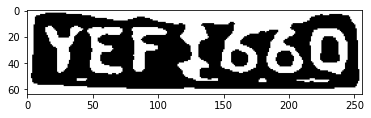

Binary string list of various resizes
['Ta', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', '', 'agi', 'apa', 'aes', 'aeTIA', 'aa I', 'hae T IA', '', 'fg', 'fag', 'apa', 'agiss', 'axa', '', '', 'fae', 'apse', 'apa']
**************************************
Gray img pred string : YEF 2660


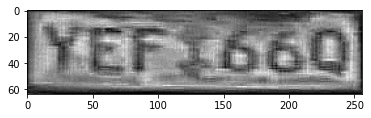

Gray string list of various resizes
['YER S660', 'YEF 600', 'YEF 2660', 'YEF 2560', '¥YEFSS560', 'VEFrF 2.560', 'VTErl ooo', 'Vers oop', 'Se |', 'VERGO', 'YEFZ660', 'YEF S600', 'YEF 1660', '', '', 'Y¥EF 2660', '', '', 'NEF E660', '', '', '', '', '', '', '', 'NEFIOO0', '', '', '', '', 'NEFSG6O', '', 'NEF S660', '']
********************************************************************************************
Original img pred string : YJZ=59P)


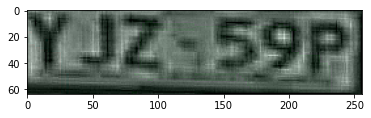

Binary string list of various resizes
['132559?', 'YIZ=59P)', 'YJZ=59P)', 'YJIZ=59P)', 'VIZ = SSP}', '¥I2 >= SSP}', 'V2 = SSP}', '', '', '', '1325557)', 'YJZ559P)', 'YIZ=59P)', 'YIZ=59P)', 'YJZ=59P)', 'YJIZ=S9P)', 'YJIZ=59P)', '', '', '13259?', 'YJZ:59P)', 'YJZ559P)', 'YIZ=59P)', 'YJIZ=59P)', '', '', '1Zs59P', '132557)', 'YJZ:59P,', 'YJZ559P)', '', '', '', '12:55?', '132597)']
**************************************
Binary img pred string : YJZ-S9OP)


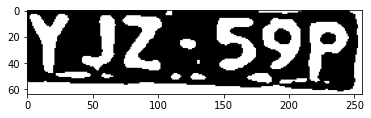

Binary string list of various resizes
['ALES', 'YJZ-59P)', 'YJZ-S9OP)', 'Ores]', 'YJIZ- SOP}', '\\ a aed ad', 'VWAIZ- SOP}', 'VJIZ- SOP]', '» a Pe ed', '', 'ALES]', 'ASST', '(ATSES)', 'Ar Ses) 2', '(ALS s 12', 'YIZ-S9P)', '', '', '', 'ELSES]', 'ELSES]', 'ELSES', '(ELSES) 2', 'YIZ-59P;', '', '', 'aT?', 'ELSES]', 'ELSI 2', 'ELSES]', '', '', '', 'Y12:59P', 'ELSES]']
**************************************
Gray img pred string : YJZ=59P)


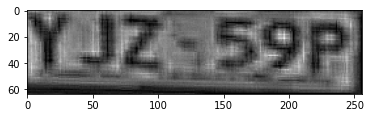

Gray string list of various resizes
['132359?', 'YIZ=59P)', 'YJZ=59P)', 'YJIZ=S9P)', 'VIZ = SSP}', '¥I2 >= SSP}', 'V2 = SS P|', 'VS 2. > SSF)', 'YY = >| SSF |', '', '13Z:59P)', 'YJZ559P)', 'VIZ" 59P)', 'YJZ=59P)', 'YJZ=59P)', 'YJIZ-=S9P)', 'YJIZ=59P)', '', '', '1375557)', 'YJZ:59P)', 'YIZ=59P', 'YIZ=59P)', 'YJZ=59P)', '', '', 'Zs59P', '1375597)', 'YJZ:59P,', 'YJZ559P)', '', '', '', '12:55?', '132557)']
********************************************************************************************
Original img pred string : VJIZ559P


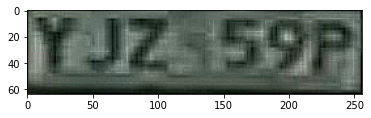

Binary string list of various resizes
['WE 55P', 'YJZ559P', 'VJIZ559P', 'VJIZ-S9P', 'VIZ SSP', 'VJIZ-SvP', '¥ JZ STE', '', '', '', 'YZ559P', 'YJZ559P', 'YJZ- 59P', 'YJZ°59P', '', 'YJIZ-S9P', 'VJIZ-SIP', '', '', 'YIZ359P', 'YJZ559P', 'YJZ°59P', 'YJZ°59P', 'YJZ°59P', '', '', 'HZ59P', '17559?', 'YIZ59P', 'YJZ59P', '', '', '', 'YL 59P', 'YE59P']
**************************************
Binary img pred string : Olah


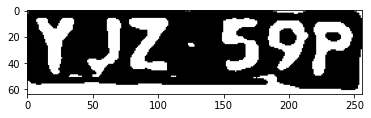

Binary string list of various resizes
['eras', 'YJZ:59P', 'Olah', 'mr atid', '¥ IZ. SOP', 'VY IZ. S9P', 'a Pe ee', 'ha Pee ed od', '» a Pe ie ood', '', 'YJZ:59P', 'YJZ-59P', 'YJZ-59P', 'Or ae Sls', '{Sra h is', 'Pah die', 'YJIZ-5S9OP,', '', 'BS)', 'aT)', 'eae', 'Praag', '| Oa', 'YJZ=59P', '', '', 'YJU:597', 'ee', 'Pao', 'rae S Ti', '', '', '', 'Fe', 'Ae']
**************************************
Gray img pred string : VJIZ"59P


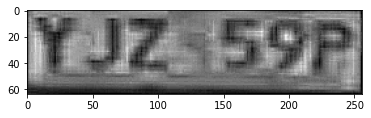

Gray string list of various resizes
['WE 55P', 'YJZ°59P', 'VJIZ"59P', 'YJIZ-S9P', '¥JIZ- SIP', 'VIZ SovP', 'VJ 2 STE', '', '', '', 'YIZ559P', 'YJZ559P', 'YJZ- 59P', 'YJZ° 59P', '', '¥JIZ-S9P', 'VJIZ“S9P', '', '', 'YIZ359P', 'YJZ59P', 'YJZ559P', 'YJZ°59P', 'YJZ°59P', '', '', 'YE 55P', 'YIZs59P', 'YJZ:59P', 'YJZ559P', '', '', '', 'YL 5P', 'YIZs59P']
********************************************************************************************
Original img pred string : YJIZS59P


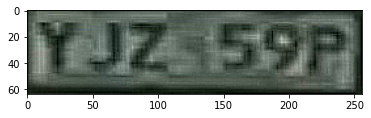

Binary string list of various resizes
['YIZS59P', 'YJZ°59P', 'YJIZS59P', 'YJIZsS5S9P', '¥IZ=S9P', '¥JIZ SSP', '', 'pet a tg', '', '', 'YZ 59P', 'YJZ-59P', 'YJZ°59P', 'YJIZ-59P', 'YIZ{59P', 'YJIZ-5S9P', '', '', 'LIZ 55P', '1IZ:59P', '', 'YJZ:59P', '', '', '', 'JL 59P', '', 'YIZS59P', '', 'YJZ:59P', '', '', '', 'YZ: 59', 'YIZS59P']
**************************************
Binary img pred string : er SE TTD


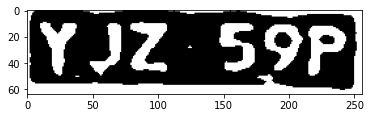

Binary string list of various resizes
['aT)', 'ray', 'er SE TTD', 'YJIZ SOP', 'Pati', 'ba Pasa', 'b a Pee ae', 'iWTIZ SOP]', 'bh a Pee a ae', '', 'Pi', 'OLS h ls', 'Oral s', 'YJZ-59P', 'YJZ-S9OP', 'YJIZ- SOP', 'eer aed', '', 'ee', 'A)', 'ELEY)»', 'Pra', '{OY SET', 'YJZ-59P', '', '', 'eT', 'Aa', 'Paes', 'ere ii', '', '', 'eae', 'es)', 'a']
**************************************
Gray img pred string : ¥JIZ-5S9P


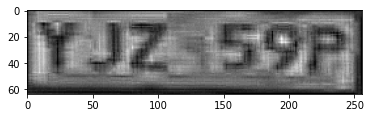

Gray string list of various resizes
['YIZ559P', 'YJZ°59P', '¥JIZ-5S9P', 'YJIZ=5S9P', '¥IZ=S9P', '¥IZ-— SIP', '¥ 32 -— SFr', 'pel a ag', '¥ J] SSF', '', 'YIZ:59P', 'YJZ:59P', 'VJZ°59P', 'YJZ<59P', '', 'VJIZ=59P', '', '', '259°', 'YIZ:59P', 'YJ Z-59P', 'YJZ:59P', 'YJZ:59P', 'YJIZ°59P', '', '', 'HIZA59P', 'YZ: 59P', 'YJZ:59P', 'YJZ559P', '', '', 'aT;', 'LIZ59P', 'TIZ359P']
********************************************************************************************


In [7]:
kernel = numpy.array([[-1,-1,-1], 
                       [-1, 9,-1],
                       [-1,-1,-1]])


for img_path in fnames:
    test_image = cv2.imread(img_path)
    
    test_image = cv2.filter2D(test_image, -1, kernel) # ap
    
    test_all_formats(test_image)
    print('********************************************************************************************')